Hier werden zunächst die Pakete installiert, die man zum Auswerten braucht, und den Paketen Kurznamen wie "Pd" zur Verwendung im Programm gegeben (oder fachsprachlich, es werden "Objekte instantiiert" auf die man in der Punktschreibweise zugreifen kann. Mit der "Tab" taste kann man Auto-vervollständigen und so sehen was das Paket alles kann.

Das ganze wird mit Copy-and-Paste fähigen Codebeispielen erklärt hier:
<a href="https://github.com/jakevdp/PythonDataScienceHandbook/blob/8a34a4f653bdbdc01415a94dc20d4e9b97438965/notebooks/Index.ipynb">PythonDataScience Handbook</a>

Zusätzlich zu den Standardpaketen aus Anaconda habe ich ein Paket installiert, das eine Faktoranalyse ermöglicht. Das ging im Terminal mit dem Befehl:

    conda install -c desilinguist factor_analyzer

Danach waren leider Matplotlib und Seaborn kaputt, weil der factor_analyzer irgend was up/downgegraded hat.

Ich habe Matplotlib vom Terminal aus noch einmal neu installiert mit:

    python -m pip install -U matplotlib

und danach Seaborn mit:

    pip install seaborn

was ich jeweils durch googlen von "install matplotlib (etc.)" rausgefunden habe. Dann lief es wieder.

Jetzt kommt der erste Teil vom Programm:

In [22]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from pandas.plotting import scatter_matrix

numpy erlaubt das Spielen mit grooooßen Datensätzen. Pandas (Python Analytical Data Science, oder so) enthält Tools für die Auswertung und kann fast alles was SPSS auch kann. matplotlib ist so etwas wie gnuplot oder Matlab, es erlaubt Daten in Graphen zu visualisieren (wird hier zum plot-Obkekt plt, plt. + TAB zeigt die Plotstyles). Seaborn ist eine weitere Sammlung die das Plotten noch schöner und 3-Dimensional macht.

Pandas, hier kurz als pd. - Objekt instantiiert, kann Excel-Tabellen lesen. So wie unten. Bitte den Dateinamen ersetzen durch die eigene Datei. Mit sheet_name='' gibt man das Tabellenblatt an, das man lesen will. Anschliessend kann man sich durch print() anzeigen lassen was man gelesen hat.

In [12]:
from factor_analyzer import FactorAnalyzer

dtpre=pd.read_excel('RTOP.xlsx', sheet_name='Rohdaten')
print(dtpre.head(3))

   Format  Präsenz  Präsenz.1  Präsenz.2  Präsenz/Zoom  Päsenz  Präsenz.3  \
0       1        3          0          3             1       2          4   
1       2        2          1          4             4       3          4   
2       3        1          0          4             2       3          3   

   Präsenz.4  Präsenz.5  Präsenz/Zoom.1  Präsenz.6  Präsenz.7  Päsenz/Zoom  \
0          3          1               2          0          0            4   
1          4          0               4          3          0            2   
2          4          0               2          1          0            3   

   Präsenz.8  Präsenz.9  
0          3          3  
1          4          3  
2          3          3  


Der ganze Datensatz aus dem Excel-Blatt steht jetzt in der Variable "dtpre" zu verfügung und kann addiert, subtrahiert... gar heftig manipuliert werden. Hier wird dtpre erst mal transponiert, also Zeilen und Spalten vertauscht.

In [13]:
transponiert=dtpre.transpose()
print(transponiert)

                0   1   2   3   4   5   6   7   8   9  ...  15  16  17  18  \
Format           1   2   3   4   5   6   7   8   9  10 ...  16  17  18  19   
Präsenz          3   2   1   1   0   4   2   4   4   3 ...   0   0   2   1   
Präsenz.1        0   1   0   0   1   4   0   2   1   3 ...   1   0   1   0   
Präsenz.2        3   4   4   2   1   4   2   2   3   1 ...   4   1   4   1   
Präsenz/Zoom     1   4   2   0   2   4   2   4   2   4 ...   2   1   2   3   
Päsenz           2   3   3   3   2   3   3   2   3   1 ...   2   3   3   3   
Präsenz.3        4   4   3   2   2   3   4   4   4   4 ...   3   2   4   3   
Präsenz.4        3   4   4   3   3   4   4   4   4   2 ...   2   4   4   4   
Präsenz.5        1   0   0   0   1   4   2   3   2   2 ...   0   1   1   0   
Präsenz/Zoom.1   2   4   2   3   4   4   3   4   2   4 ...   2   2   2   3   
Präsenz.6        0   3   1   1   1   4   2   3   2   1 ...   2   1   2   1   
Präsenz.7        0   0   0   0   1   4   2   2   2   4 ...   0  

Mit der Bracket-Schreibweise kann man sich einzelne Zeilen und Spalten herausgreifen und hier zum Beispiel in eine neue Variable "pre" speichern. Vor dem Komma stehen die Zeilen, nach dem Komma die Spalten. 1:15 heisst von Zeile 1 bis zeile 15, wobei pandas bei Zeile 0 anfängt zu zählen.

Die Nullte Zeile (Format) stört hier zum Beispiel, ich erzeuge mit der Bracket-schreibweise einen Auszug "Pre" ab der ersten Zeile und rechne damit weiter.

In [14]:
pre=transponiert.iloc[1:15, 0:25]
print(pre)

                0   1   2   3   4   5   6   7   8   9  ...  15  16  17  18  \
Präsenz          3   2   1   1   0   4   2   4   4   3 ...   0   0   2   1   
Präsenz.1        0   1   0   0   1   4   0   2   1   3 ...   1   0   1   0   
Präsenz.2        3   4   4   2   1   4   2   2   3   1 ...   4   1   4   1   
Präsenz/Zoom     1   4   2   0   2   4   2   4   2   4 ...   2   1   2   3   
Päsenz           2   3   3   3   2   3   3   2   3   1 ...   2   3   3   3   
Präsenz.3        4   4   3   2   2   3   4   4   4   4 ...   3   2   4   3   
Präsenz.4        3   4   4   3   3   4   4   4   4   2 ...   2   4   4   4   
Präsenz.5        1   0   0   0   1   4   2   3   2   2 ...   0   1   1   0   
Präsenz/Zoom.1   2   4   2   3   4   4   3   4   2   4 ...   2   2   2   3   
Präsenz.6        0   3   1   1   1   4   2   3   2   1 ...   2   1   2   1   
Präsenz.7        0   0   0   0   1   4   2   2   2   4 ...   0   1   0   0   
Päsenz/Zoom      4   2   3   2   2   4   2   4   4   4 ...   2  

Wie sieht das deskriptiv aus? Boxplots sind immer gut. Und mit Datensatz.describe() kann man sich alle statistischen Maße raushauen lassen.

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1b7e6550>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1b7e6c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1b7e63c8>,
 'medians': [<matplotlib.lines.Line2D at 0x1a1b7e4390>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a1b7e4710>,
 'means': []}

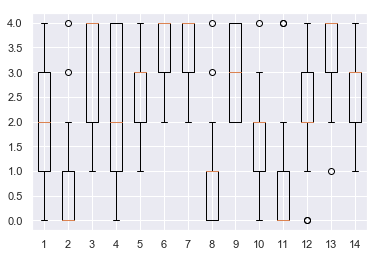

In [15]:
plt.boxplot(pre)

In [26]:
description = pre.describe()
print(description)

              0          1          2          3          4          5   \
count  14.000000  14.000000  14.000000  14.000000  14.000000  14.000000   
mean    2.071429   2.714286   2.071429   1.714286   1.857143   3.857143   
std     1.439246   1.489893   1.439246   1.382783   1.167321   0.363137   
min     0.000000   0.000000   0.000000   0.000000   0.000000   3.000000   
25%     1.000000   2.000000   1.000000   0.250000   1.000000   4.000000   
50%     2.500000   3.000000   2.500000   2.000000   2.000000   4.000000   
75%     3.000000   4.000000   3.000000   3.000000   2.000000   4.000000   
max     4.000000   4.000000   4.000000   4.000000   4.000000   4.000000   

              6          7          8          9     ...             15  \
count  14.000000  14.000000  14.000000  14.000000    ...      14.000000   
mean    2.428571   3.214286   2.714286   2.785714    ...       1.928571   
std     1.016350   0.892582   0.994490   1.188313    ...       1.328057   
min     0.000000   2.000

Hier startet die Faktoranalayse

In [16]:
fa = FactorAnalyzer()

Im Beispiel sind 3 Faktoren vorgeschlagen, ich analysiere mit 5

In [17]:
fa.analyze(transponiert, 5, rotation=None)

Das sieht aber so aus, als würden die ersten 3 Faktoren ausreichen um 90% der Varianz zu erklären. Ich glaube, das war der Sinn der Sache

In [18]:
fa.get_factor_variance()

,Factor1,Factor2,Factor3,Factor4,Factor5
SS Loadings,18.973480,2.996884,0.730145,0.538591,0.390646
Proportion Var,0.758939,0.119875,0.029206,0.021544,0.015626
Cumulative Var,0.758939,0.878815,0.908020,0.929564,0.945190


Schau mal an. Die Frage 0( RTOP 1, weil der RTOP fängt bei 1 an zu zählen und nicht bei 0) lädt auf Faktor 2, und die Frage 10 (RTOP 11)=  lädt total auf Faktor 1 und gar nicht auf Faktor 2. Jetzt müsste man damit herausfinden was Faktor 1 und 2 unterscheidet...

In [19]:
fa.loadings

,Factor1,Factor2,Factor3,Factor4,Factor5
0,0.063551,0.804079,0.485749,0.087432,-0.069660
1,0.174988,0.842408,-0.231684,-0.076094,0.433968
2,0.456211,0.819181,0.032108,-0.097900,-0.022648
3,0.643112,0.615223,-0.109110,0.099962,-0.233619
4,0.725107,0.250865,-0.286905,0.478677,-0.063964
5,0.743523,-0.431094,-0.023754,0.064967,0.066760
6,0.891905,0.204486,0.047173,0.091876,-0.092141
7,0.872441,-0.054579,0.236583,0.232018,0.222790
8,0.905913,0.014716,0.398211,-0.112114,-0.049460
9,0.797933,-0.326785,0.160808,0.320624,0.108898


Das sagt mir gerade nichts. Frage 6 beim RTOP ist anscheinend sehr unique

In [20]:
fa.get_uniqueness()

,Uniqueness
0,0.100970
1,0.011931
2,0.109685
3,0.131433
4,0.095749
5,0.252089
6,0.143535
7,0.076428
8,0.005518
9,0.115996
